This research uses the CMU_ARCTIC database, which is a speech database in CMU_ARCTIC speech synthesis databases, established by the Language Technologies Institute of Carnegie Mellon University, USA. This database is mainly used in the research of speech synthesis. The content of the corpus database was selected by the non-copyright center of Project Gutenberg, which is about 1150 sentences. An audio of two males and two females with American English accents were collected. The recording format is 16 bits, the sampling rate is 32 KHz, and the length of each sentence is 3 seconds. The database has a total of 4528 audio files.

The length and the width of the generated space are 5 × 5, 5 × 6, 6 × 6, 7 × 6, and 7 × 7 (m) and height 2.5 m.

The position of the two microphones is x = (width/2) ± 0.3, y = 1, z = 1

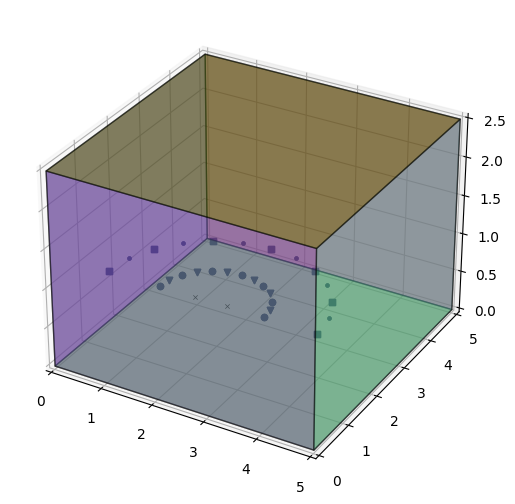

In [31]:
import pyroomacoustics as pra
import numpy as np
from scipy.io import wavfile
import math

rooms_dim = [[5.,5.]]
sources = ["C:\\Users\\Alex\\source\\repos\\Data\\Sound\\arctic_a0010.wav"] # size 100
azimuth = np.arange(0, 181, 15, dtype=float) / 180. * np.pi # 15 degrees distance
distances = np.array([1., 2.]) # source distance of 1 and 2 meters

for room_dim in rooms_dim:   
    w = room_dim[0]
    l = room_dim[1]
    h = 2.5

    # create room
    room = pra.ShoeBox(room_dim, fs=fs)
    room.extrude(h)

    # add microphones
    mic_loc = np.c_[[(w/2) + 0.3, 1., 1.],[(w/2) - 0.3, 1., 1.]]
    room.add_microphone_array(mic_loc)

    # add sources
    for source in sources:
        fs, signal = wavfile.read(source)
        for angle in azimuth:
            for distance in distances:
                source_location = [(w/2) + distance * np.cos(angle), 1. + distance * np.sin(angle), 1.]
                room.add_source(source_location, signal=signal)

    
    fig, ax = room.plot()
    ax.set_xlim([0, 5])
    ax.set_ylim([0, 5])
    ax.set_zlim([0, 2.5])

In [32]:
snr = 10*math.log10(room.n_mics/0.005)

room.simulate()

t60 = pra.experimental.measure_rt60(room.rir[0][0], fs=room.fs, plot=False)
print(f"The RT60 is {t60 * 1000:.0f} ms")

The RT60 is 19 ms


In [33]:
import IPython

# original signal
print("Original WAV:")
IPython.display.Audio(signal, rate=fs)

Original WAV:


In [34]:
print("Simulated propagation to first mic:")
IPython.display.Audio(room.mic_array.signals[0,:], rate=fs)

Simulated propagation to first mic:
